In [6]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Marvel_Movies_Dataset.csv')

print("Show file contents")
display(df.head())

Show file contents


,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

df = pd.read_csv('Marvel_Movies_Dataset.csv')

df.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6


In [10]:
# Data conversion into proper format 
df['Release Date'] = pd.to_datetime(df['Release Date (DD-MM-YYYY)'])
df['Year'] = df['Release Date'].dt.year

df['Profit'] = df['Worldwide Gross (in million $)'] - df['Budget (in million $)']

df['ROI'] = (df['Profit'] / df['Budget (in million $)']) * 100

cinemascore_map = {
    'A+': 4.33, 'A': 4.0, 'A-': 3.67,
    'B+': 3.33, 'B': 3.0, 'B-': 2.67
}
df['CinemaScore_Num'] = df['CinemaScore (grades A+ to F)'].map(cinemascore_map)

print("Data Feature Engineering Complete.")

NameError: name 'pd' is not defined

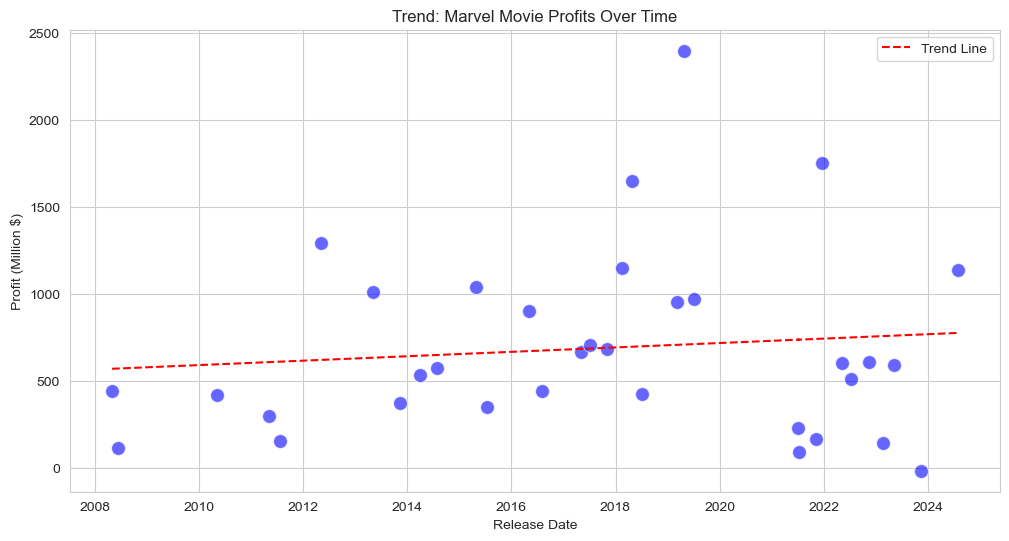

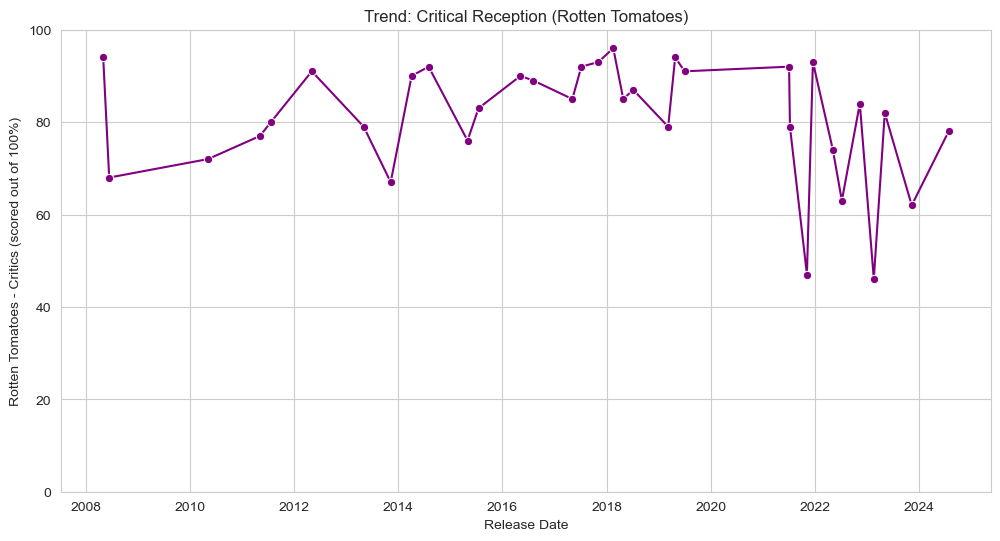

In [12]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Release Date', y='Profit', s=100, color='blue', alpha=0.6)

z = np.polyfit(df['Release Date'].map(pd.Timestamp.toordinal), df['Profit'], 1)
p = np.poly1d(z)
plt.plot(df['Release Date'], p(df['Release Date'].map(pd.Timestamp.toordinal)), "r--", label='Trend Line')

plt.title('Trend: Marvel Movie Profits Over Time')
plt.xlabel('Release Date')
plt.ylabel('Profit (Million $)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Release Date', y='Rotten Tomatoes - Critics (scored out of 100%)', marker='o', color='purple')
plt.title('Trend: Critical Reception (Rotten Tomatoes)')
plt.ylim(0, 100)
plt.show()

In [14]:
# Define cohorts
cutoff_date = pd.Timestamp('2021-01-01')
pre_era = df[df['Release Date'] < cutoff_date]
post_era = df[df['Release Date'] >= cutoff_date]

def perform_ttest(metric, name):
    group1 = pre_era[metric].dropna()
    group2 = post_era[metric].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    
    print(f"--- {name} Analysis ---")
    print(f"Pre-2021 Mean: {group1.mean():.2f} | Post-2021 Mean: {group2.mean():.2f}")
    print(f"P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Conclusion: Statistically SIGNIFICANT decline.")
    else:
        print("Conclusion: Difference is NOT statistically significant (likely due to high variance).")
    print("")

perform_ttest('Profit', 'Profitability')
perform_ttest('Rotten Tomatoes - Critics (scored out of 100%)', 'Critical Quality')

--- Profitability Analysis ---
Pre-2021 Mean: 764.93 | Post-2021 Mean: 530.36
P-value: 0.2354
Conclusion: Difference is NOT statistically significant (likely due to high variance).

--- Critical Quality Analysis ---
Pre-2021 Mean: 84.78 | Post-2021 Mean: 72.73
P-value: 0.0385
Conclusion: Statistically SIGNIFICANT decline.



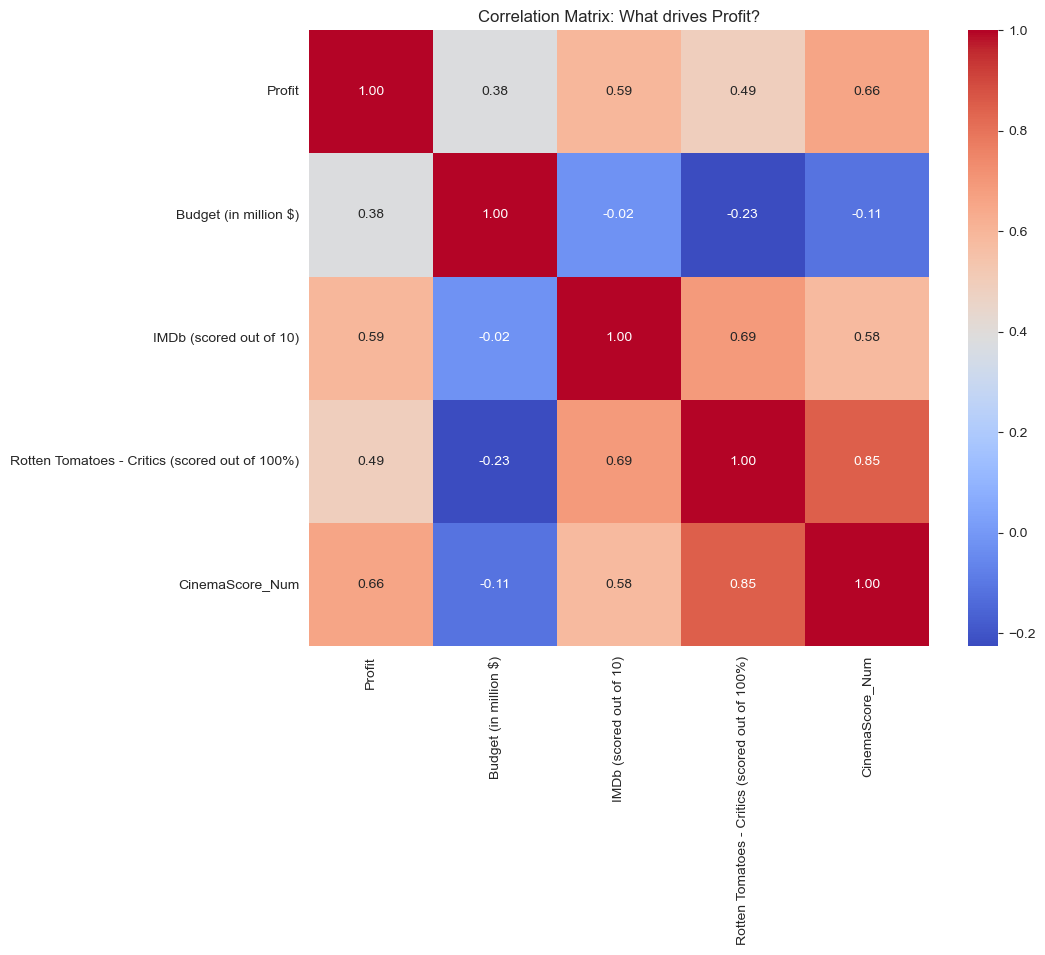

Correlation with Profit:
Profit                                            1.000000
CinemaScore_Num                                   0.659428
IMDb (scored out of 10)                           0.593189
Rotten Tomatoes - Critics (scored out of 100%)    0.490728
Budget (in million $)                             0.377820
Name: Profit, dtype: float64


In [16]:
features = ['Profit', 'Budget (in million $)', 'IMDb (scored out of 10)', 
            'Rotten Tomatoes - Critics (scored out of 100%)', 'CinemaScore_Num']

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: What drives Profit?')
plt.show()

print("Correlation with Profit:")
print(corr_matrix['Profit'].sort_values(ascending=False))

In [18]:
# Feature Selection
X = df[['Budget (in million $)', 'IMDb (scored out of 10)', 'CinemaScore_Num', 'Rotten Tomatoes - Critics (scored out of 100%)']].dropna()
y = df.loc[X.index, 'Profit']

# Train/Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f"Model R-Squared: {r2:.3f} (The model explains {r2*100:.1f}% of the variance in profit)")

# Show Coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients (Impact on Profit in Millions):")
print(coef_df)

Model R-Squared: 0.653 (The model explains 65.3% of the variance in profit)

Model Coefficients (Impact on Profit in Millions):
                                          Feature  Coefficient
0                           Budget (in million $)     1.999454
1                         IMDb (scored out of 10)   220.487211
2                                 CinemaScore_Num   991.411923
3  Rotten Tomatoes - Critics (scored out of 100%)   -12.299619
